## Assignment 2 Part B - Cluster Some Data

**_Bo Cao,  NUID:  001834167_**

### Dataset Description:

    The dataset I picked is a collection of the U.S airline delay information on Jan. 1st, 2015. Such 9 kinds of fields included in the raw datesets:

* **AIRLINE, FLIGHT_NUMBER**
* **ORIGIN_AIRPORT, DESTINATION_AIRPORT**
* **SCHEDULED_DEPARTURE, DEPARTURE_TIME, DEPARTURE_DELAY**
* **DISTANCE**
* **SCHEDULED_ARRIVAL, ARRIVAL_TIME, ARRIVAL_DELAY**
* DIVERTED
* CANCELLED (Flight Cancelled (1 = cancelled))
* CANCELLATION_REASON (Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security)
* **AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY**

31 columns of data included totally for above kinds of data

data tag in **bold** will be keep in the dataset, other columns of data will be discarded

In [9]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

# Make plots larger
plt.rcParams['figure.figsize'] = (16, 10)

In [10]:
#read flights.csv in flights
flights = pd.read_csv('flights.csv', sep=',')

## show the data samples of first 10 lines
flights.head(n=10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Drop inapporate data and make the dataset clean.
flights2 = flights.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','CANCELLATION_REASON'],axis=1)
flights2.head(3000)

,AIRLINE,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,AS,98,5,2354.0,-11.0,1448,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,AA,2336,10,2.0,-8.0,2330,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,US,840,20,18.0,-2.0,2296,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,AA,258,20,15.0,-5.0,2342,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,AS,135,25,24.0,-1.0,1448,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN
5,DL,806,25,20.0,-5.0,1589,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
6,NK,612,25,19.0,-6.0,1299,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN
7,US,2013,30,44.0,14.0,2125,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN
8,AA,1112,30,19.0,-11.0,1464,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN
9,DL,1173,30,33.0,3.0,1747,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN


In [12]:
# Show all the data whose flight is not diverted and not cancelled, then store them in flights_valid.
flights3 = flights2.loc[flights2['DIVERTED']==0]
flights_valid = flights3.loc[flights3['CANCELLED']==0]
flights_valid = flights_valid[flights_valid['ARRIVAL_DELAY'] <=180]
flights_valid= flights_valid.drop(['DIVERTED','CANCELLED','DEPARTURE_TIME','ARRIVAL_TIME','AIRLINE','SCHEDULED_ARRIVAL','FLIGHT_NUMBER','DEPARTURE_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis=1)

flights_valid


,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY
0,5,1448,-22.0
1,10,2330,-9.0
2,20,2296,5.0
3,20,2342,-9.0
4,25,1448,-21.0
5,25,1589,8.0
6,25,1299,-17.0
7,30,2125,-10.0
8,30,1464,-13.0
9,30,1747,-15.0


In [13]:
# setting color function
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

## K-means method clusters

In [14]:
# Fit a k-means estimator
X = np.array(flights_valid)
estimator = KMeans(n_clusters = 6)
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (labels)

[0 3 3 ... 1 1 1]


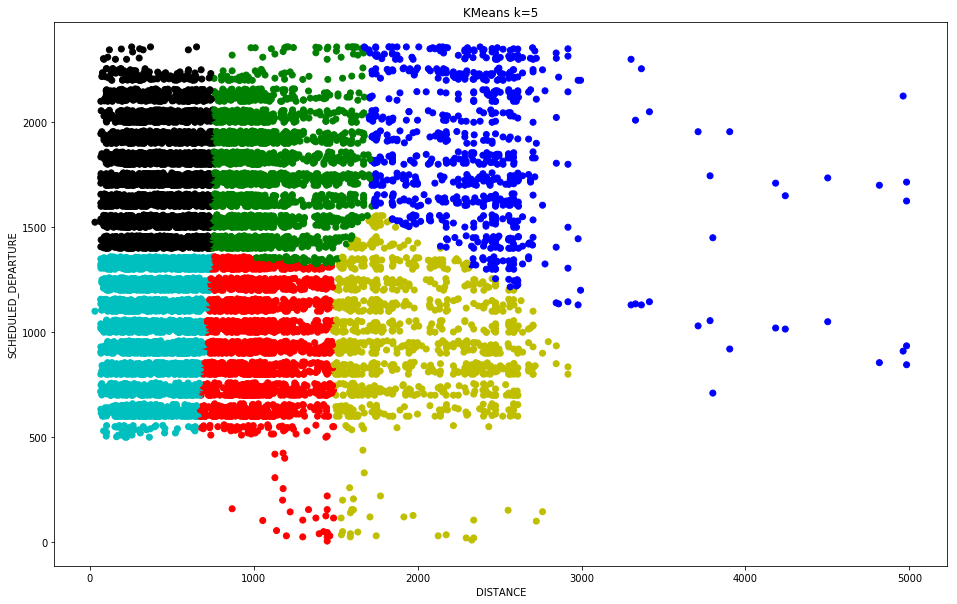

In [15]:
colors = set_colors(labels)
plt.scatter(flights_valid['DISTANCE'],flights_valid['SCHEDULED_DEPARTURE'], c=colors)
plt.title("KMeans k=5")
plt.xlabel("DISTANCE")
plt.ylabel("SCHEDULED_DEPARTURE")
plt.show()

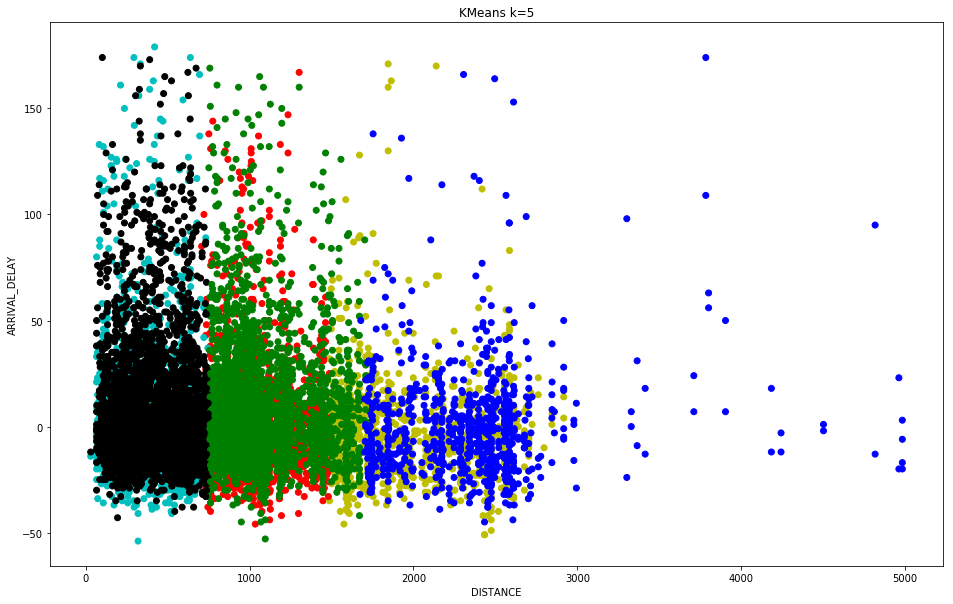

In [16]:
colors = set_colors(labels)
plt.scatter(flights_valid['DISTANCE'],flights_valid['ARRIVAL_DELAY'], c=colors)
plt.title("KMeans k=5")
plt.xlabel("DISTANCE")
plt.ylabel("ARRIVAL_DELAY")
plt.show()

#### What could be read from the diagram above?

We use K-means method to get the clusters. From that, we can see that there are five clusters in DISTANCE-SCHEDULED_DEPARTURE axis plot. The dataset can be divided into short-flight, medium-flight and long-flight, and each of them has morning-noon and afternoon-evening time parts. Also we can see that short-flight and medium-flight flights are easily to get delay than the long-flight. 

## DBSCAN method cluster

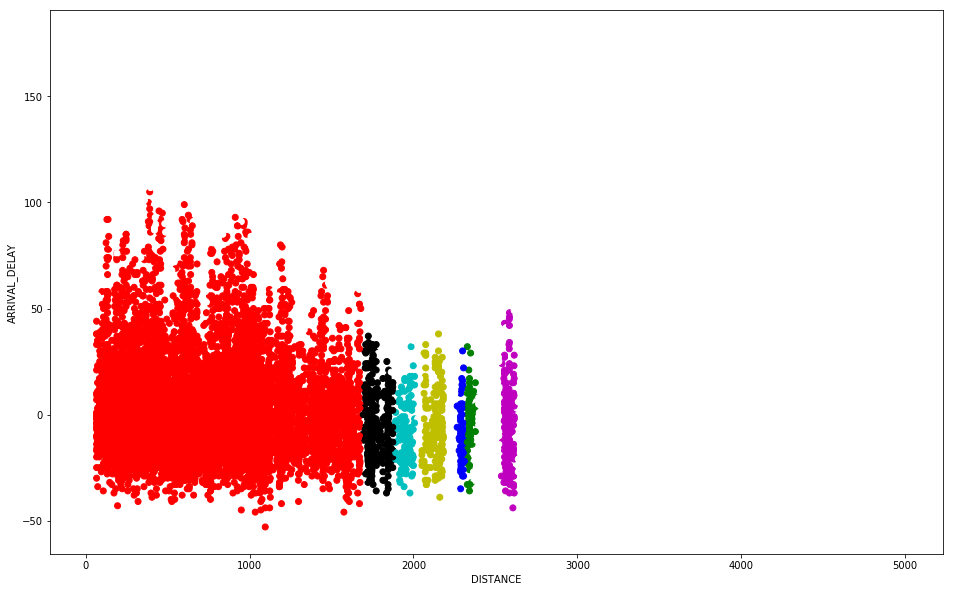

In [29]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=15, min_samples=10)
X = flights_valid[["DISTANCE","ARRIVAL_DELAY"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(flights_valid['DISTANCE'],flights_valid['ARRIVAL_DELAY'], c=colors)
plt.xlabel("DISTANCE")
plt.ylabel("ARRIVAL_DELAY")
plt.show()

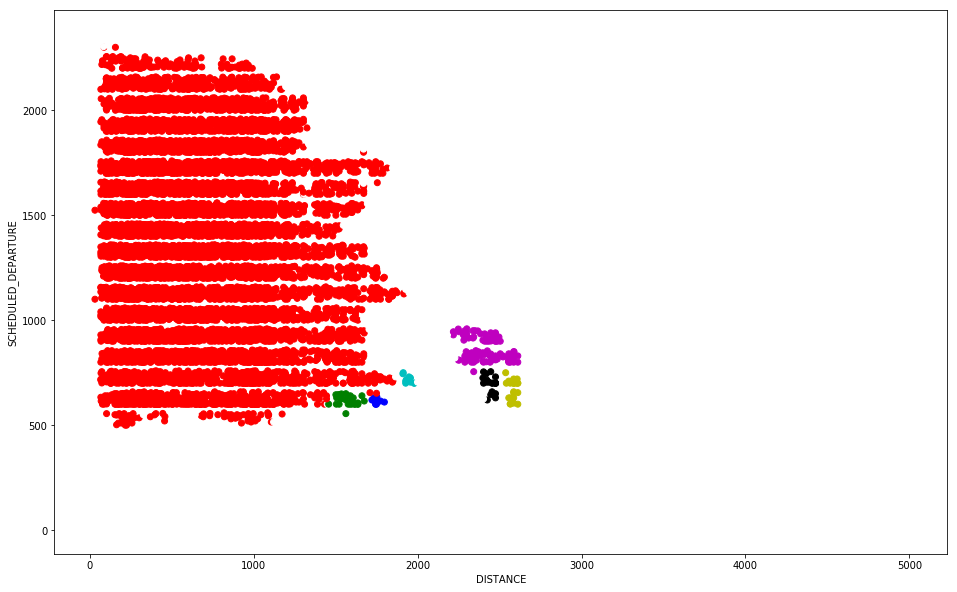

In [32]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=50, min_samples=10)
X = flights_valid[["DISTANCE","SCHEDULED_DEPARTURE"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(flights_valid['DISTANCE'],flights_valid['SCHEDULED_DEPARTURE'], c=colors)
plt.xlabel("DISTANCE")
plt.ylabel("SCHEDULED_DEPARTURE")
plt.show()

#### What could be read from the diagram above?


We use DBSCAN method to get the clusters. From that, we can see that there are seven clusters in diagram. Although we get different cluster from what we get in K-means method, we still can get the information that short-flight delay more easily than longer flights.

## Conclusion

As for the results we get, using different method can get different clusters. When we change the scaling, the structure of cluster can get slightly changed. To sum up the flight delay information, we can see that shorter flights delay more easily than longer flights.